The goal is to see if the reconstruction error histogram is the same for the new SC-Sylv trained on Jean-Zay and the previous one trained on rosette

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from statannotations.Annotator import Annotator

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/__init__.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [30]:
#Load files

Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/with_all_the_regions/test_Central_sulcus/SC-sylv_right_UKB_16-20-03_123/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/with_all_the_regions/test_Central_sulcus/SC-sylv_right_UKB_16-20-03_123/hcp/Embeddings.csv")
Embeddings_epilepsy= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/with_all_the_regions/test_Central_sulcus/SC-sylv_right_UKB_16-20-03_123/epilepsy_PBS/Embeddings.csv")

Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/with_all_the_regions/test_Central_sulcus/SC-sylv_right_UKB_16-20-03_123/Reconstruction_error.csv")
Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/with_all_the_regions/test_Central_sulcus/SC-sylv_right_UKB_16-20-03_123/hcp/Reconstruction_error.csv")
Reconstruc_error_epilepsy= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/with_all_the_regions/test_Central_sulcus/SC-sylv_right_UKB_16-20-03_123/epilepsy_PBS/Reconstruction_error.csv")

In [31]:
#The part of UKB not seen during the training
UKB_val_label= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/with_all_the_regions/test_Central_sulcus/SC-sylv_right_UKB_16-20-03_123/val_label.csv", header=None, names=["Index"])

In [32]:
UKB_val_label

,Index
0,5304596
1,5511122
2,1703156
3,2310443
4,5121953
...,...
8482,3278003
8483,1588982
8484,1650958
8485,1083254


In [33]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [34]:
Participants_epilepsy

,Index,Diagnosis
0,control01,controls
1,control02,controls
2,control03,controls
3,control04,controls
4,control05,controls
5,control06,controls
6,control07,controls
7,control08,controls
8,control09,controls
9,control10,controls


In [35]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]
epilepsy_irm_neg= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_negatives_centrales"]
epilepsy_irm_pos= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_positives_centrales"]

In [36]:
epilepsy_irm_pos

,Index,Diagnosis
32,sujet02_pos,irm_positives_centrales
33,sujet03_pos,irm_positives_centrales
34,sujet04_pos,irm_positives_centrales
35,sujet05_pos,irm_positives_centrales
36,sujet06_pos,irm_positives_centrales
37,sujet07_pos,irm_positives_centrales
38,sujet08_pos,irm_positives_centrales
39,sujet09_pos,irm_positives_centrales
40,sujet10_pos,irm_positives_centrales
41,sujet11_pos,irm_positives_centrales


In [37]:
#We rename the first colomn 

Reconstruc_error_epilepsy  = Reconstruc_error_epilepsy.rename(columns={Reconstruc_error_epilepsy.columns[0]: "Index"})
Embeddings_epilepsy  = Embeddings_epilepsy.rename(columns={Embeddings_epilepsy.columns[0]: "Index"})

Reconstruc_error_UKB  = Reconstruc_error_UKB.rename(columns={Reconstruc_error_UKB.columns[0]: "Index"})
Embeddings_UKB  = Embeddings_UKB.rename(columns={Embeddings_UKB.columns[0]: "Index"})

In [38]:
#From epilepsy, we separate controls, irm_negatives and irm_positives 

Reconstruc_error_controls = Reconstruc_error_epilepsy.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
Reconstruc_error_irm_negatives = Reconstruc_error_epilepsy.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
Reconstruc_error_irm_positives = Reconstruc_error_epilepsy.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

Embeddings_controls = Embeddings_epilepsy.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
Embeddings_irm_negatives = Embeddings_epilepsy.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
Embeddings_irm_positives = Embeddings_epilepsy.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

In [39]:
epilepsy_controls

,Index,Diagnosis
0,control01,controls
1,control02,controls
2,control03,controls
3,control04,controls
4,control05,controls
5,control06,controls
6,control07,controls
7,control08,controls
8,control09,controls
9,control10,controls


In [40]:
Reconstruc_error_irm_negatives

,Index,0
0,sujet01_neg,4203.624023
1,sujet03_neg,3633.142578
2,sujet07_neg,3983.527588
3,sujet08_neg,4960.020508
4,sujet10_neg,4753.197266
5,sujet12_neg,4691.456055
6,sujet13_neg,5479.308594
7,sujet15_neg,3855.137939
8,sujet16_neg,4289.882324
9,sujet20_neg,5346.845703


In [41]:
Reconstruc_error_UKB_val= Reconstruc_error_UKB.merge(UKB_val_label[["Index"]], on="Index", how="inner")
Embeddings_UKB_val= Embeddings_UKB.merge(UKB_val_label[["Index"]], on="Index", how="inner")

$\textbf{ Histogramme des erreurs de reconstruction}$

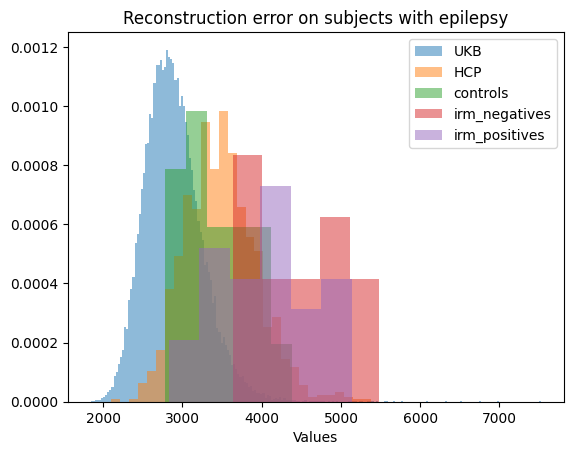

In [42]:
plt.hist(Reconstruc_error_UKB.iloc[:,1], bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(Reconstruc_error_HCP.iloc[:,1], bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_controls.iloc[:,1], bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(Reconstruc_error_irm_negatives.iloc[:,1], bins="auto", alpha=0.5, label="irm_negatives", density=True)
plt.hist(Reconstruc_error_irm_positives.iloc[:,1], bins="auto", alpha=0.5, label="irm_positives", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on subjects with epilepsy")
plt.legend()
plt.show()

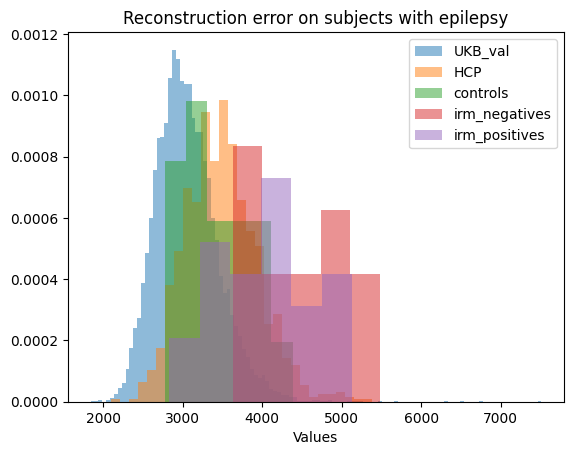

In [15]:
plt.hist(Reconstruc_error_UKB_val.iloc[:,1], bins="auto", alpha=0.5, label="UKB_val", density=True)
plt.hist(Reconstruc_error_HCP.iloc[:,1], bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_controls.iloc[:,1], bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(Reconstruc_error_irm_negatives.iloc[:,1], bins="auto", alpha=0.5, label="irm_negatives", density=True)
plt.hist(Reconstruc_error_irm_positives.iloc[:,1], bins="auto", alpha=0.5, label="irm_positives", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on subjects with epilepsy")
plt.legend()
plt.show()

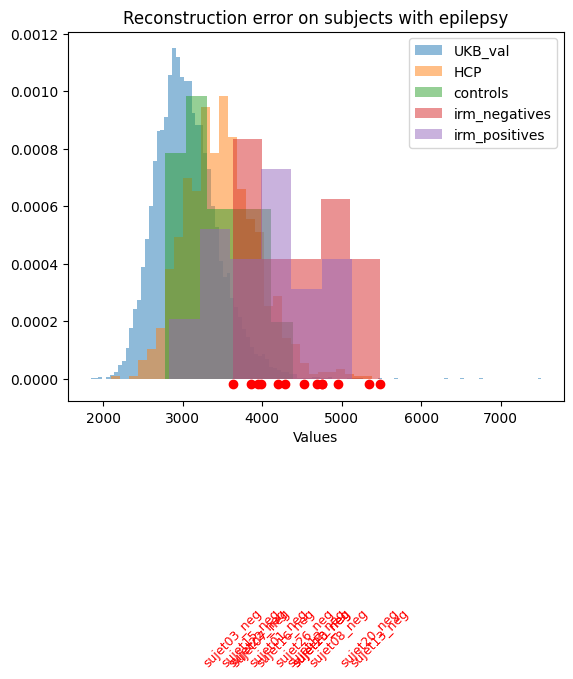

In [16]:
plt.hist(Reconstruc_error_UKB_val.iloc[:,1], bins="auto", alpha=0.5, label="UKB_val", density=True)
plt.hist(Reconstruc_error_HCP.iloc[:,1], bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_controls.iloc[:,1], bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(Reconstruc_error_irm_negatives.iloc[:,1], bins="auto", alpha=0.5, label="irm_negatives", density=True)
plt.hist(Reconstruc_error_irm_positives.iloc[:,1], bins="auto", alpha=0.5, label="irm_positives", density=True)

#Add index from irm_negatives
y_positions = np.zeros(len(Reconstruc_error_irm_negatives))  
plt.scatter(Reconstruc_error_irm_negatives.iloc[:,1], y_positions - 0.00002, color="red", zorder=5)

for x, idx in zip(Reconstruc_error_irm_negatives.iloc[:,1], Reconstruc_error_irm_negatives.iloc[:,0]):
    plt.text(x, -0.001, idx, rotation=45, ha="center", fontsize=9, color="red")

plt.xlabel("Values")

plt.title("Reconstruction error on subjects with epilepsy")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [17]:
X1 = Embeddings_UKB.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]
X3= Embeddings_controls.iloc[:,1:76]
X4= Embeddings_irm_negatives.iloc[:,1:76]
X5= Embeddings_irm_positives.iloc[:,1:76]
X6 = Embeddings_UKB_val.iloc[:,1:76] 

In [18]:
X7= Embeddings_epilepsy.iloc[:,1:76]

In [19]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)
X4_umap=reducer.transform(X4)
X5_umap=reducer.transform(X5)
X6_umap=reducer.transform(X6)

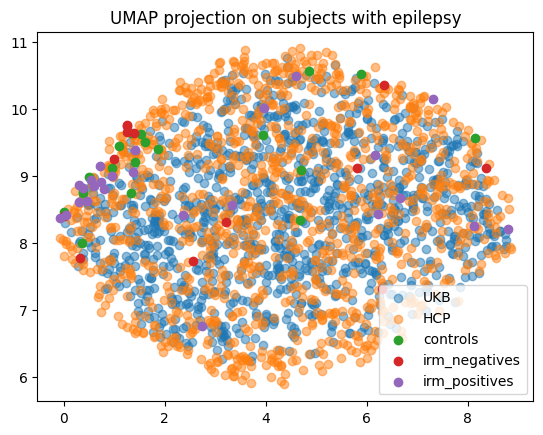

In [20]:
plt.scatter(X1_umap[0:len(X2),0], X1_umap[0:len(X2),1], label="UKB", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="controls")
plt.scatter(X4_umap[:,0], X4_umap[:,1], label="irm_negatives")
plt.scatter(X5_umap[:,0], X5_umap[:,1], label="irm_positives")

plt.title("UMAP projection on subjects with epilepsy")
plt.legend()
plt.show()

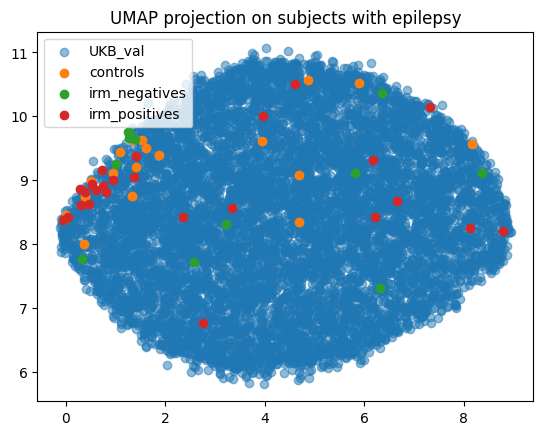

In [21]:
plt.scatter(X6_umap[:,0], X6_umap[:,1], label="UKB_val", alpha=0.5)
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="controls")
plt.scatter(X4_umap[:,0], X4_umap[:,1], label="irm_negatives")
plt.scatter(X5_umap[:,0], X5_umap[:,1], label="irm_positives")

plt.title("UMAP projection on subjects with epilepsy")
plt.legend()
plt.show()

In [22]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X7)
X1_umap = reducer.transform(X3) #Controls
X2_umap = reducer.transform(X4)  #irm_negatives
X3_umap= reducer.transform(X5)  #irm_positives

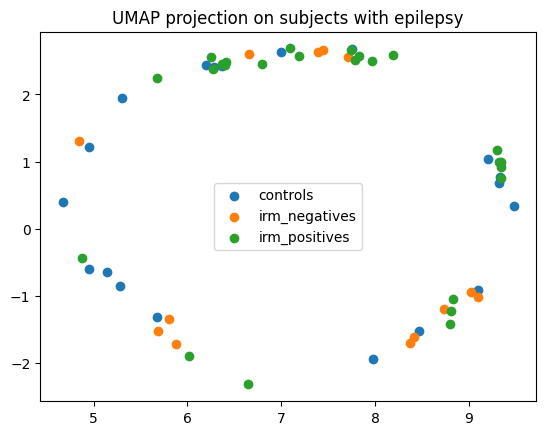

In [23]:
plt.scatter(X1_umap[:,0], X1_umap[:,1], label="controls")
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="irm_negatives")
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="irm_positives")

plt.title("UMAP projection on subjects with epilepsy")
plt.legend()
plt.show()

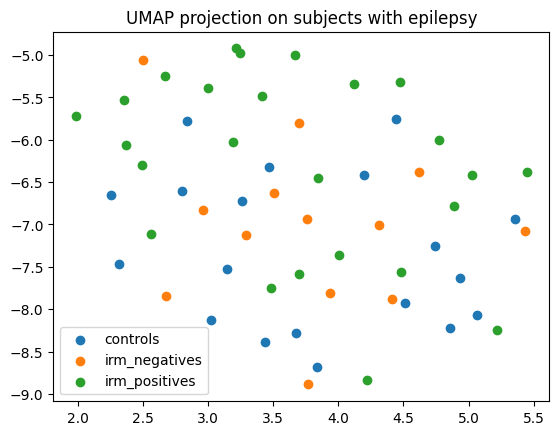

In [24]:
X=np.concatenate([X3,X4,X5], axis=0)
X_umap = reducer.fit_transform(X)

plt.scatter(X_umap[:len(X3),0], X_umap[:len(X3),1], label="controls")
plt.scatter(X_umap[len(X3):len(X3)+len(X4),0], X_umap[len(X3):len(X3)+len(X4),1], label="irm_negatives")
plt.scatter(X_umap[len(X3)+len(X4):,0], X_umap[len(X3)+len(X4):,1], label="irm_positives")

plt.title("UMAP projection on subjects with epilepsy")
plt.legend()
plt.show()

Boxplots of reconstruction errors

In [25]:
Reconstruc_error_UKB= Reconstruc_error_UKB.iloc[:,1]
Reconstruc_error_HCP= Reconstruc_error_HCP.iloc[:,1]
Reconstruc_error_controls= Reconstruc_error_controls.iloc[:,1]
Reconstruc_error_irm_negatives= Reconstruc_error_irm_negatives.iloc[:,1]
Reconstruc_error_irm_positives= Reconstruc_error_irm_positives.iloc[:,1]

In [26]:
Reconstruc_error_UKB= pd.DataFrame({
    'database': 'UKB',
    'Reconstruc_error': Reconstruc_error_UKB
})

Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': Reconstruc_error_HCP
})

Reconstruc_error_controls=pd.DataFrame({
    'database': 'controls',
    'Reconstruc_error': Reconstruc_error_controls
})

Reconstruc_error_irm_negatives=pd.DataFrame({
    'database': 'irm_negatives',
    'Reconstruc_error': Reconstruc_error_irm_negatives
})

Reconstruc_error_irm_positives=pd.DataFrame({
    'database': 'irm_positives',
    'Reconstruc_error': Reconstruc_error_irm_positives
})


In [27]:
Reconstruc_error_UKB

,database,Reconstruc_error
0,UKB,2726.425293
1,UKB,2984.175293
2,UKB,3312.738281
3,UKB,2973.837402
4,UKB,3103.183594
...,...,...
42428,UKB,2857.341064
42429,UKB,3087.666016
42430,UKB,2652.197021
42431,UKB,2993.993652


In [28]:
Reconstruct_error= pd.concat([Reconstruc_error_UKB,Reconstruc_error_HCP,Reconstruc_error_controls,Reconstruc_error_irm_negatives, Reconstruc_error_irm_positives ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCP vs. controls: Mann-Whitney-Wilcoxon test two-sided, P_val:7.218e-01 U_stat=1.109e+04
controls vs. irm_negatives: Mann-Whitney-Wilcoxon test two-sided, P_val:5.607e-05 U_stat=1.800e+01
irm_negatives vs. irm_positives: Mann-Whitney-Wilcoxon test two-sided, P_val:6.946e-02 U_stat=2.220e+02
HCP vs. irm_negatives: Mann-Whitney-Wilcoxon test two-sided, P_val:1.385e-07 U_stat=1.095e+03
controls vs. irm_positives: Mann-Whitney-Wilcoxon test two-sided, P_val:2.620e-03 U_stat=1.100e+02
HCP vs. irm_positives: Mann-Whitney-Wilcoxon test two-sided, P_val:2.054e-05 U_stat=6.997e+03


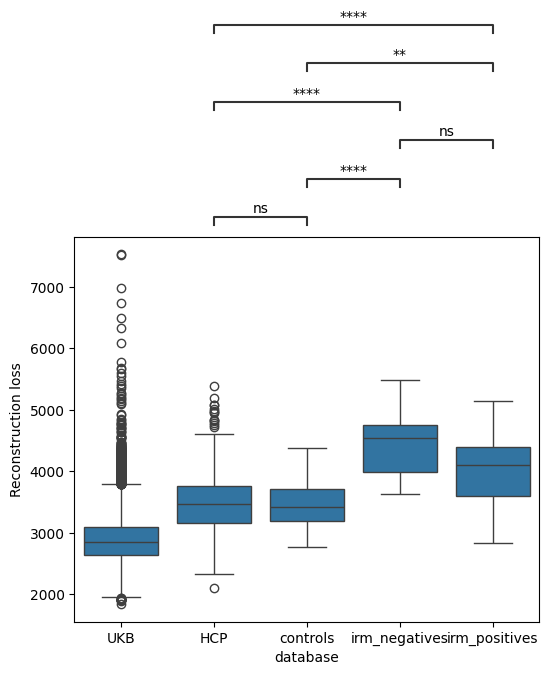

In [29]:

plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("HCP", "controls"), ("HCP", "irm_negatives"), ("HCP", "irm_positives"), ("controls", "irm_negatives"), ("controls", "irm_positives"), ("irm_negatives", "irm_positives")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()